In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
import sklearn 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df = pd.read_csv('../csv/players_stats.csv')

clustering_df = df.drop(columns=["Unnamed: 0","Player", "final_team","Pos"])
pca = PCA(n_components=0.85, svd_solver = 'full')
pcabis = pca.fit(clustering_df)

reducedDataSet = pcabis.transform(clustering_df)
print(reducedDataSet)
#print(pcabis.explained_variance_ratio_)

[[ 0.84113948 -0.42857802 -0.17260036  0.38756091 -0.26018113]
 [ 0.85354131 -0.31163634  0.07790326  0.23581557  0.10509289]
 [ 1.11881991  0.3072969  -0.12578452 -0.03827483 -0.41208819]
 ...
 [ 0.57540536 -0.62774762  0.17692356 -0.36209982 -0.21830085]
 [ 0.76020993 -0.65133443  0.21798098 -0.49619749 -0.0907791 ]
 [ 1.03453314 -0.62501759  0.0190781  -0.34656654 -0.12295003]]


In [9]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(clustering_df)
distances, indices = nbrs.kneighbors(clustering_df)

[0.88365782]


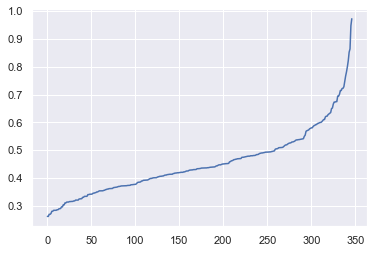

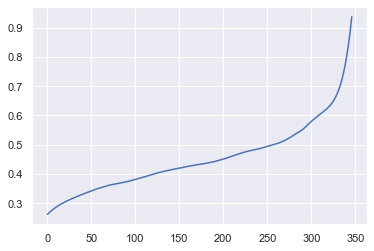

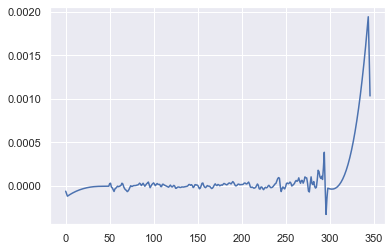

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
distancebis = savgol_filter(distances,201,5)
plt.figure(0)
plt.plot(distances)
plt.figure(1)
plt.plot(distancebis)


# compute second derivative
smooth_d2 = np.gradient(np.gradient(distancebis))
plt.figure(2)
plt.plot(smooth_d2)
infls = np.where(np.diff(np.sign(smooth_d2 )))[0]
optiepsiIndex = np.where(smooth_d2 == np.amax(smooth_d2))[0]
optiepsi = distancebis[optiepsiIndex]
print(optiepsi)


In [11]:
m = DBSCAN(eps=optiepsi, min_samples=5)
m.fit(clustering_df)

DBSCAN(eps=array([0.78085115]))

In [6]:
clusters = m.labels_

In [7]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

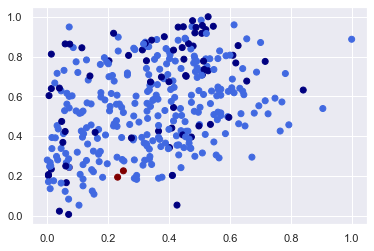

In [8]:
plt.scatter(clustering_df[clustering_df.columns[0]], clustering_df[clustering_df.columns[1]], c=vectorizer(clusters))

In [9]:
print(len(clusters))

347


In [10]:
print(len(clustering_df))

347
